# PCA NA+EUR 
# DISTANCE MAHAL

In [88]:
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import pandas as pd
import rasterio
import matplotlib.pyplot as plt

In [89]:
crta_coords = pd.read_csv('calculate_aoo/df2csv/cornuta_all.csv')
crta_coords = crta_coords[(crta_coords['lat']>0) & (crta_coords['long']>-20)]
print(f'lat_min = {crta_coords['lat'].min()}\nlat_max = {crta_coords['lat'].max()}\nlon_min = {crta_coords['long'].min()}\nlat_max = {crta_coords['long'].max()}\n')

lat_min = 34.9625
lat_max = 59.918117
lon_min = -7.537369
lat_max = 51.08368



In [90]:
bbox = [-8, 35, 52, 60] #minx, miny, maxx, maxy

num_points_side = int(np.sqrt(5000))  
lons = np.linspace(bbox[0], bbox[2], num_points_side)
lats = np.linspace(bbox[1], bbox[3], num_points_side)

grid_points = [Point(lon, lat) for lat in lats for lon in lons]
grid_gdf = gpd.GeoDataFrame(geometry=grid_points)

shapefile_path = 'data/shapefiles/ne_110m_land/ne_110m_land.shp'
gdf = gpd.read_file(shapefile_path)

lakes_shapefile_path = 'data/shapefiles/ne_110m_lakes/ne_110m_lakes.shp'
lakes_gdf = gpd.read_file(lakes_shapefile_path)

land_points = grid_gdf[grid_gdf['geometry'].apply(lambda point:gdf.contains(point).any() and not lakes_gdf.contains(point).any())]
land_coordinates = [(point.y, point.x) for point in land_points['geometry']]

lakes = cfeature.NaturalEarthFeature(category='physical', name='lakes', scale='110m')

(-10.99999999999996, 52.9999999999998, 33.99999999999987, 69.03428709808546)

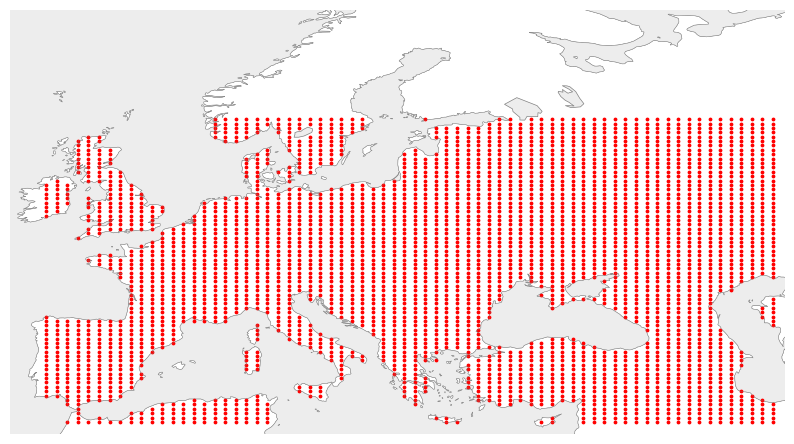

In [91]:

plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax = plt.gca()
ax.set_extent([-11, 53, 34,  66])  # Set the extent (longitude, longitude, latitude, latitude)


ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='gray', linewidth=.5)
ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
ax.add_feature(lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')

#ndvi_tiff_path = '/home/mpgetz/repos/bee_mapping/data/wc2.1_30s_bio/NDVI_hires.tif'
#with rasterio.open(ndvi_tiff_path) as ndvi_src:
#   ndvi_data = ndvi_src.read(1)
#    vmin, vmax = ndvi_data.min(), ndvi_data.max()

#    plt.imshow(ndvi_data, vmin=-1, vmax=1, origin='upper', transform=ccrs.PlateCarree(), cmap='twilight_shifted')

lats, lons = zip(*land_coordinates)
ax.scatter(lons, lats, transform=ccrs.PlateCarree(), marker='o', color='red', s=3)
ax.axis('off')

# cbar = plt.colorbar(label='NDVI', fraction=0.03, pad=0.04)
# cbar.set_label('NDVI') , extent=[-127, -64.5, 34, 55]

In [92]:
europe_df = pd.DataFrame(land_coordinates, columns=['lat', 'lon'])

In [93]:
# import os
# from concurrent.futures import ThreadPoolExecutor


# def get_value_from_array(lat, long, src, array):
#     try:
#         row, col = src.index(long, lat)
#         return array[row, col]
#     except Exception as e:
#         print(f'Error at {lat}, {long}: {e}')
#         return None
    
# ndvi_tiff_path = 'data/tifs/NDVI_Image.tif'
# all_files = [ndvi_tiff_path]

# print(all_files)

# def process_file(file):
#     column_name = 'ndvi'
#     print(f'Processing: {column_name}\n')

#     with rasterio.open(file) as src:
#         array = src.read(1)  
#         europe_df[column_name] = europe_df.apply(lambda row: get_value_from_array(row['lat'], row['lon'], src, array), axis=1)

# with ThreadPoolExecutor(max_workers=1) as executor: 
#     executor.map(process_file, all_files)

# directory = 'data/wc2.1_30s_bio'
# all_files = [f for f in os.listdir(directory) if f.endswith('.tif') and "wc2.1_30s_" in f]

# print(all_files)

# def process_file(file):
#     column_name = file.split("wc2.1_30s_")[1].replace(".tif", "")
#     file_path = os.path.join(directory, file)
#     print(f'Processing: {column_name}\n')

#     with rasterio.open(file_path) as src:
#         array = src.read(1)  
#         europe_df[column_name] = europe_df.apply(lambda row: get_value_from_array(row['lat'], row['lon'], src, array), axis=1)

# with ThreadPoolExecutor(max_workers=4) as executor:  
#     executor.map(process_file, all_files)

# europe_df.to_csv('data/csv/europe_bioclim_ndvi.csv')


In [94]:
europe_df = pd.read_csv('data/csv/europe_bioclim_ndvi.csv')
europe_df.drop(columns=['Unnamed: 0'])

,lat,lon,ndvi,bio_13,bio_11,bio_9,bio_5,elev,bio_6,bio_3,...,bio_2,bio_16,bio_15,bio_1,bio_8,bio_19,bio_14,bio_7,bio_18,bio_4
0,35.0,-6.260870,-0.125140,-3.400000e+38,-3.400000e+38,-3.400000e+38,-3.400000e+38,-32768,-3.400000e+38,-3.400000e+38,...,-3.400000e+38,-3.400000e+38,-3.400000e+38,-3.400000e+38,-3.400000e+38,-3.400000e+38,-3.400000e+38,-3.400000e+38,-3.400000e+38,-3.400000e+38
1,35.0,-5.391304,0.283199,1.490000e+02,1.096667e+01,2.548333e+01,3.360000e+01,328,5.200000e+00,3.984742e+01,...,1.131667e+01,4.140000e+02,8.102385e+01,1.797500e+01,1.096667e+01,4.140000e+02,0.000000e+00,2.840000e+01,1.100000e+01,5.869393e+02
2,35.0,-4.521739,0.163205,1.260000e+02,5.750000e+00,2.031667e+01,2.950000e+01,1343,4.000000e-01,4.083620e+01,...,1.188333e+01,3.630000e+02,7.010957e+01,1.264167e+01,6.750000e+00,3.500000e+02,2.000000e+00,2.910000e+01,2.400000e+01,5.944051e+02
3,35.0,-3.652174,0.131960,8.000000e+01,5.966667e+00,2.040000e+01,2.900000e+01,1270,1.000000e+00,3.946429e+01,...,1.105000e+01,2.100000e+02,5.642151e+01,1.277500e+01,5.966667e+00,2.100000e+02,5.000000e+00,2.800000e+01,3.700000e+01,5.924545e+02
4,35.0,-2.782609,0.130316,5.800000e+01,1.168333e+01,2.335000e+01,3.080000e+01,323,6.300000e+00,4.323129e+01,...,1.059167e+01,1.290000e+02,7.305995e+01,1.734583e+01,1.221667e+01,1.250000e+02,0.000000e+00,2.450000e+01,1.400000e+01,4.868333e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,60.0,48.521739,0.303576,8.100000e+01,-1.166667e+01,-4.116667e+00,2.200000e+01,183,-1.690000e+01,2.137961e+01,...,8.316667e+00,2.250000e+02,3.443332e+01,1.808333e+00,1.505000e+01,1.110000e+02,2.600000e+01,3.890000e+01,2.250000e+02,1.075533e+03
3412,60.0,49.391304,0.321320,7.900000e+01,-1.166667e+01,-4.116667e+00,2.240000e+01,184,-1.630000e+01,2.088717e+01,...,8.083333e+00,2.150000e+02,3.583277e+01,1.958333e+00,1.535000e+01,1.030000e+02,2.500000e+01,3.870000e+01,2.150000e+02,1.087950e+03
3413,60.0,50.260870,0.268473,8.000000e+01,-1.241667e+01,-4.866667e+00,2.260000e+01,184,-1.740000e+01,2.160417e+01,...,8.641666e+00,2.170000e+02,3.527664e+01,1.545834e+00,1.528333e+01,1.010000e+02,2.600000e+01,4.000000e+01,2.170000e+02,1.114048e+03
3414,60.0,51.130435,0.265417,8.100000e+01,-1.278333e+01,-5.116667e+00,2.280000e+01,164,-1.890000e+01,2.250200e+01,...,9.383333e+00,2.180000e+02,3.641564e+01,1.300000e+00,1.523333e+01,1.050000e+02,2.500000e+01,4.170000e+01,2.180000e+02,1.129461e+03


In [95]:
europe = europe_df.copy()
europe_points = europe[['lat', 'lon']]
europe = europe.drop(columns=['lat', 'lon', 'bio_8', 'Unnamed: 0'])
europe['group'] = 'europe'

In [96]:
europe = europe[europe['elev'] > 0]


In [97]:
europe.describe()

,ndvi,bio_13,bio_11,bio_9,bio_5,elev,bio_6,bio_3,bio_17,bio_12,bio_10,bio_2,bio_16,bio_15,bio_1,bio_19,bio_14,bio_7,bio_18,bio_4
count,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000
mean,0.254352,85.156567,-1.402486,5.991782,25.468656,417.281759,-5.831898,30.270877,103.534912,661.994156,18.675746,9.267782,232.981544,33.707585,8.620667,160.608121,30.553983,31.300554,174.256844,821.593774
std,0.082816,33.149773,5.733253,10.904702,4.722478,530.565971,5.895086,5.859146,58.312386,270.438398,3.806443,1.769590,93.922090,15.933750,4.043764,95.132773,18.328635,6.161037,88.003959,206.470981
min,-0.231159,16.000000,-17.916666,-17.916666,2.800000,1.000000,-22.400000,18.612520,0.000000,124.000000,-1.500000,3.666667,42.000000,8.452323,-9.775000,24.000000,0.000000,14.400001,0.000000,329.865400
25%,0.211163,67.000000,-5.816667,-2.383333,22.350000,110.000000,-10.000000,25.143116,76.000000,524.500000,16.166666,8.108334,182.000000,23.196458,5.708334,106.000000,22.000000,27.000000,119.000000,669.991070
50%,0.268172,80.000000,-1.466667,1.533333,24.400000,190.000000,-5.700000,30.080782,96.000000,611.000000,17.766666,8.833333,219.000000,30.909689,8.212500,124.000000,29.000000,31.100000,192.000000,799.005430
75%,0.308787,93.000000,2.791667,17.066668,28.250000,505.000000,-1.100000,34.737777,123.000000,726.000000,20.800000,10.225000,253.000000,37.907331,10.862500,188.000000,37.000000,35.900000,225.000000,972.531200
max,0.468739,349.000000,14.216667,35.200000,44.400000,4506.000000,8.400000,48.260075,464.000000,2687.000000,35.200000,16.199999,965.000000,100.287120,24.820833,850.000000,142.000000,49.000000,607.000000,1374.563500


In [98]:
america = pd.read_csv('data/csv/10k_america_bioclim_ndvi.csv', index_col=None)

america = america[america['bio_13']!= -3.4e+38]
america = america[america['elev']> 0]
column_order = europe_df.columns.tolist()
america = america[column_order]
america_points = america[['lat', 'lon']].reset_index(drop=True)
america = america.drop(columns=['lat', 'lon', 'bio_8', 'Unnamed: 0'])
america['group'] = 'america'



In [99]:
america.describe()

,ndvi,bio_13,bio_11,bio_9,bio_5,elev,bio_6,bio_3,bio_17,bio_12,bio_10,bio_2,bio_16,bio_15,bio_1,bio_19,bio_14,bio_7,bio_18,bio_4
count,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000,6535.000000
mean,0.235197,101.041469,-3.609023,1.989141,28.133145,735.869778,-11.084560,34.686399,110.543076,745.135425,19.782900,13.170054,275.061668,42.666961,8.379412,155.037337,31.820352,39.217705,224.174139,950.504845
std,0.099214,51.872439,9.630384,12.744884,5.347003,668.523579,9.759577,9.044435,83.993989,412.019893,5.157114,2.420581,146.538098,22.180030,6.865420,149.920757,25.567825,6.647571,104.611049,251.542649
min,-0.194264,10.000000,-22.516666,-21.066668,7.500000,1.000000,-30.100000,18.310658,0.000000,60.000000,0.833333,5.558333,24.000000,5.816862,-5.608333,17.000000,0.000000,14.300001,2.000000,199.059810
25%,0.166246,72.000000,-10.800000,-8.766666,23.700000,254.000000,-18.500000,26.796895,42.000000,416.000000,15.750000,11.466667,189.000000,23.083239,2.720833,54.000000,11.000000,34.600000,150.000000,772.351480
50%,0.242886,98.000000,-3.800000,-1.433333,28.500000,464.000000,-10.700000,34.080300,80.000000,695.000000,19.516666,12.658334,269.000000,40.438663,7.679167,108.000000,22.000000,39.200000,238.000000,923.962160
75%,0.304186,118.000000,3.591667,14.483334,32.400000,1120.000000,-3.600000,40.714015,171.000000,1009.000000,23.966667,14.916667,329.000000,58.471063,13.572916,209.000000,50.000000,44.800000,297.000000,1164.580450
max,0.534848,577.000000,20.933334,29.100000,45.000000,3926.000000,17.400000,70.047165,521.000000,4233.000000,34.783333,21.108334,1645.000000,123.681450,24.941666,1384.000000,153.000000,51.600000,699.000000,1451.338600


In [100]:
osmia = pd.read_csv('data/csv/bioclim.csv')
osmia = osmia[column_order]
osmia = osmia[osmia['bio_13']!=-3.4e+38]
osmia = osmia[osmia['elev']> 0]
coords = osmia[['lat', 'lon']]
# osmia = osmia.drop(columns=['lat', 'lon'])
# osmia['group'] = 'osmia'


crta_coords_filtered = pd.read_csv('data/csv/crta_coords_filtered.csv')
crta_coords_filtered.columns = ['lat', 'lon']
osmia = pd.merge(osmia, crta_coords_filtered, on=['lat', 'lon'])
osmia = osmia.drop_duplicates(subset=['lat', 'lon'])
osmia = osmia[osmia['bio_13']!=-3.4e+38]
osmia_coords = osmia[['lat', 'lon']]
osmia = osmia.drop(columns=['lat', 'lon', 'bio_8', 'Unnamed: 0'])
osmia['group'] = 'osmia'

In [101]:
osmia.describe()

,ndvi,bio_13,bio_11,bio_9,bio_5,elev,bio_6,bio_3,bio_17,bio_12,bio_10,bio_2,bio_16,bio_15,bio_1,bio_19,bio_14,bio_7,bio_18,bio_4
count,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000
mean,0.256794,84.391770,2.525564,6.091684,23.891918,193.477695,-0.948856,33.389905,154.334486,774.406914,17.816422,8.278501,235.904033,18.623511,10.009688,179.278848,46.286584,24.840774,212.502058,624.651607
std,0.067896,19.633771,1.817177,4.892664,1.938135,219.921097,1.876418,2.355533,37.393388,157.878150,1.560124,0.899696,54.258283,8.645285,1.356123,46.886702,12.097195,2.535589,57.132840,75.678414
min,-0.055812,41.000000,-6.516667,-6.300000,9.900000,1.000000,-11.000000,22.902868,6.000000,328.000000,5.883333,5.083334,116.000000,7.727378,-0.629167,64.000000,1.000000,15.400001,6.000000,363.726500
25%,0.218283,73.000000,1.400000,3.716667,22.800000,46.000000,-2.000000,32.142857,133.000000,668.000000,16.900000,7.691667,204.000000,13.031209,9.325000,151.000000,40.000000,22.900000,188.000000,566.954170
50%,0.263979,79.000000,2.566667,5.550000,23.400000,129.000000,-0.800000,33.234127,156.000000,772.000000,17.450000,8.141666,223.000000,15.465448,9.900000,183.000000,46.000000,24.500000,204.000000,615.575600
75%,0.303745,91.000000,3.500000,6.283333,24.700000,260.000000,0.250000,34.599107,173.000000,836.000000,18.391666,8.666667,251.000000,21.676554,10.416667,199.000000,53.000000,26.199999,226.000000,665.625000
max,0.460837,234.000000,11.600000,25.233334,34.200000,2479.000000,8.000000,46.227200,428.000000,1921.000000,25.233334,13.800000,570.000000,88.891600,18.087500,557.000000,129.000000,40.200000,552.000000,1162.149500


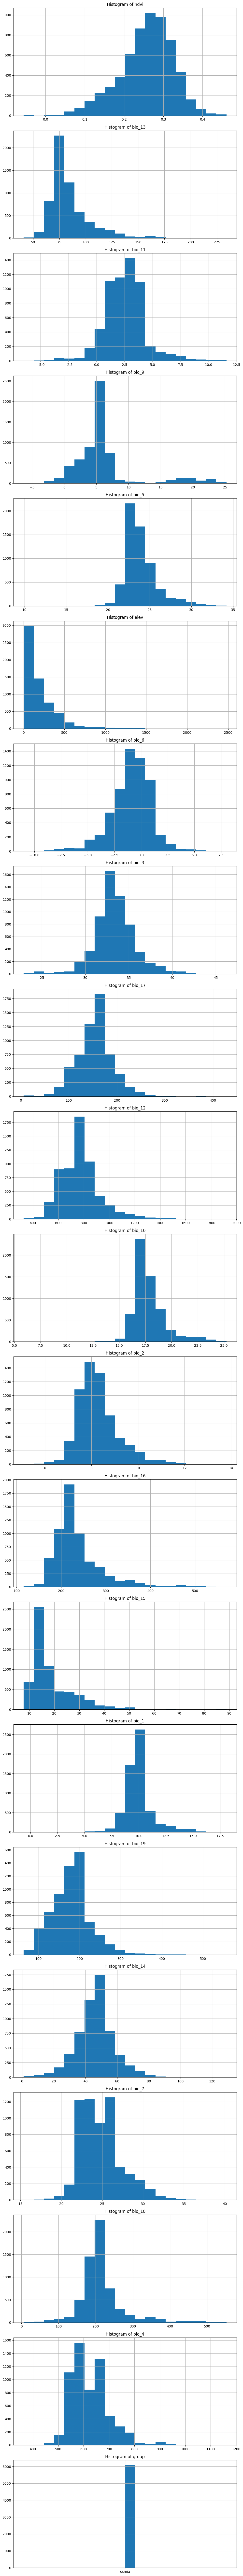

In [102]:
plt.figure(figsize=(10, 5 * len(osmia.columns)))

# Iterate over the columns
for i, column in enumerate(osmia.columns):
    # Create a subplot for each column
    plt.subplot(len(osmia.columns), 1, i + 1)
    # Plot the histogram
    osmia[column].hist(bins=20)
    # Set title
    plt.title(f'Histogram of {column}')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
combined = pd.concat([europe, america, osmia], ignore_index=True)
combined_points = pd.concat([europe_points, america_points, osmia_coords], ignore_index=True)
combined.describe()
combined_vars = combined.drop(columns=['group'])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(combined_vars)
combined_scaled = pd.DataFrame(df_scaled, columns=combined_vars.columns)
bio_columns = [col for col in combined_scaled.columns if col.startswith('bio_')]


other_columns = [col for col in combined_scaled.columns if not col.startswith('bio_')]
bio_columns_sorted = sorted(bio_columns, key=lambda x: (x.split('_')[0], int(x.split('_')[1])))
other_columns_sorted = sorted(other_columns)
sorted_columns = bio_columns_sorted + other_columns_sorted
combined_scaled = combined_scaled[sorted_columns]

In [105]:
combined_scaled.describe()

,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_9,bio_10,bio_11,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19,elev,ndvi
count,1.586100e+04,1.586100e+04,1.586100e+04,1.586100e+04,1.586100e+04,1.586100e+04,1.586100e+04,1.586100e+04,1.586100e+04,1.586100e+04,1.586100e+04,1.586100e+04,1.586100e+04,1.586100e+04,1.586100e+04,15861.000000,1.586100e+04,1.586100e+04,1.586100e+04,1.586100e+04
mean,-1.003478e-16,2.293663e-16,-8.171174e-16,-5.877511e-16,1.146831e-16,-7.167697e-17,8.601236e-17,-2.867079e-17,4.874034e-16,-4.300618e-17,1.791924e-16,-2.150309e-17,8.601236e-17,-1.146831e-16,-6.450927e-17,0.000000,1.075155e-16,-8.242851e-17,-5.734157e-17,-2.221986e-16
std,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00
min,-3.839491e+00,-2.342107e+00,-2.219102e+00,-2.488000e+00,-5.004732e+00,-2.904703e+00,-2.131725e+00,-2.489870e+00,-5.135590e+00,-2.960676e+00,-2.190444e+00,-2.070210e+00,-1.755297e+00,-1.291568e+00,-2.061400e+00,-1.846400,-2.388412e+00,-1.350890e+00,-8.173655e-01,-5.589282e+00
25%,-4.985776e-01,-8.047082e-01,-5.759826e-01,-7.899480e-01,-6.833333e-01,-5.663234e-01,-8.614402e-01,-6.487875e-01,-5.529771e-01,-5.422633e-01,-5.975239e-01,-4.935558e-01,-7.617749e-01,-7.962098e-01,-4.934069e-01,-0.760967,-4.728670e-01,-5.956643e-01,-6.368399e-01,-5.896433e-01
50%,1.012915e-01,-3.046246e-01,-3.940731e-02,-2.915203e-01,-3.376214e-01,3.787212e-01,-2.023302e-01,1.817695e-02,-2.494367e-01,2.737236e-01,-5.580226e-02,-2.138269e-01,4.250526e-02,-2.955573e-01,-2.124370e-01,0.016437,-2.818703e-02,-9.521335e-02,-3.855198e-01,1.259378e-01
75%,3.570432e-01,6.126712e-01,4.383685e-01,6.428197e-01,6.346934e-01,7.179680e-01,7.563753e-01,4.927165e-01,4.883343e-01,5.828440e-01,4.117551e-01,3.710607e-01,6.102324e-01,5.003978e-01,3.676299e-01,0.603157,5.191114e-01,3.142465e-01,1.595969e-01,6.728691e-01
max,3.239983e+00,3.638890e+00,5.448031e+00,2.702917e+00,4.113420e+00,2.850376e+00,2.338239e+00,3.015440e+00,4.147679e+00,2.964890e+00,1.126554e+01,1.234854e+01,5.483224e+00,4.607748e+00,1.263061e+01,5.795631,5.581622e+00,1.108759e+01,7.155851e+00,3.357309e+00


In [106]:
no_osmia_ind = combined[combined['group'] != 'osmia'].index
combined_filtered = combined_scaled.loc[no_osmia_ind]
combined_clipped = combined.loc[no_osmia_ind]



yes_osmia_ind = combined[combined['group'] == 'osmia'].index
osmia_scaled = combined_scaled.loc[yes_osmia_ind]

Explained Variance Ratio: [0.34959723 0.32791024 0.09790237 0.08342988 0.05339448]
Total explained variance: 0.9122342023643036


Text(0.5, 1.0, 'PCA Loadings Heatmap')

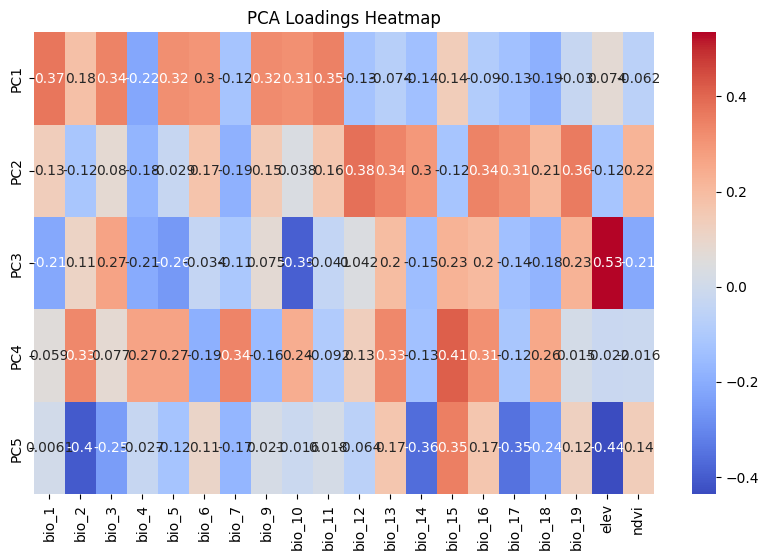

In [107]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=5) 
pca_result = pca.fit_transform(combined_filtered) 
loadings = pca.components_
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", pca.explained_variance_ratio_.sum())
loadings_df = pd.DataFrame(loadings, columns=combined_scaled.columns, index=[f'PC{i+1}' for i in range(loadings.shape[0])])
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm')
plt.title('PCA Loadings Heatmap')

In [108]:
n_components = pca_result.shape[1]

for i in range(n_components):
    combined_filtered[f'PC{i+1}'] = pca_result[:, i]


In [109]:
osmia_pca = pca.transform(osmia_scaled)
for i in range(n_components):
    osmia_scaled[f'PC{i+1}'] = osmia_pca[:, i]

In [110]:
combined_filtered['group'] = combined_clipped['group']
osmia_scaled['group'] = 'osmia'

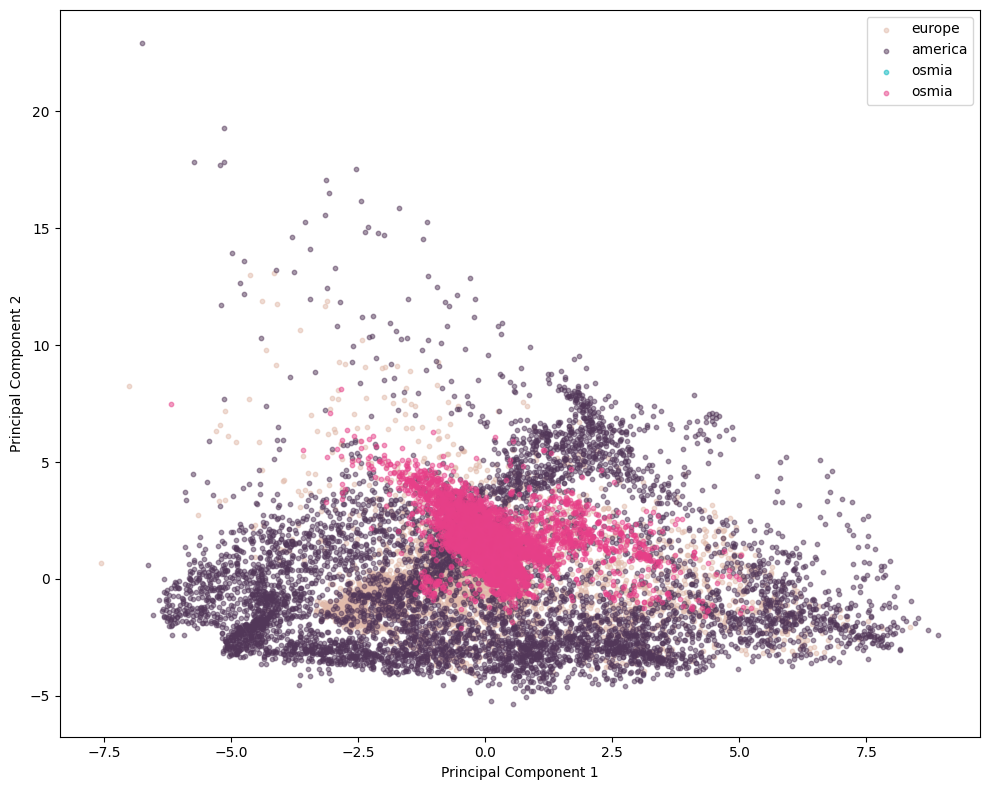

In [111]:
colors = ['#E1BAAA', '#523759', '#00B6BE','#E73F88']

plt.figure(figsize=(10, 8))

unique_labels = combined['group'].unique()  
for i, label in enumerate(unique_labels):
    subset = combined_filtered[combined_filtered['group'] == label]  
    plt.scatter(subset['PC1'], subset['PC2'], c=colors[i], label=label, s=10, marker= 'o', alpha=0.5)
plt.scatter(osmia_scaled['PC1'], osmia_scaled['PC2'], c=colors[i+1], label=label, s=10, marker= 'o', alpha=0.5)
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()

In [112]:
# osmia_scaled.reset_index(inplace=True)
# osmia_scaled[osmia_scaled['PC1']<-6]

In [113]:
# osmia_coords.iloc[3666]

In [114]:
# osmia_coords.iloc[3666]['lat']
# plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
# ax = plt.gca()
# ax.set_extent([-11, 53, 34,  66]) 

# ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='gray', linewidth=.5)
# ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
# ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
# ax.add_feature(lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')

# ax.scatter(osmia_coords.iloc[3666]['lon'], osmia_coords.iloc[3666]['lat'], transform=ccrs.PlateCarree(), marker='o', color='red', s=3)
# ax.axis('off')

In [115]:
osmia_pca_df = osmia_scaled.iloc[:, -6:-1].reset_index(drop=True)
america_pca_df = combined_filtered[combined_filtered['group'] == 'america']
america_pca_df = america_pca_df.iloc[:, -6:-1].reset_index(drop=True)
europe_pca_df = combined_filtered[combined_filtered['group'] == 'europe']
europe_pca_df = europe_pca_df.iloc[:, -6:-1].reset_index(drop=True)


In [116]:
from scipy.spatial import distance
from scipy.stats import chi2

osmia_mean = osmia_pca_df.mean()
osmia_cov = osmia_pca_df.cov()

def mahalanobis_distance(x, mean, cov):
    x_minus_mu = x - mean
    cov_inv = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, cov_inv)
    mahal = np.dot(left_term, x_minus_mu.T)
    return np.sqrt(mahal)

mahal_distances = america_pca_df.apply(lambda x: mahalanobis_distance(x, osmia_mean, osmia_cov), axis=1)

In [117]:
mahal_distances_eur = osmia_pca_df.apply(lambda x: mahalanobis_distance(x, osmia_mean, osmia_cov), axis=1)

Text(0.5, 1.0, 'distribution of mahal distances, america to eur')

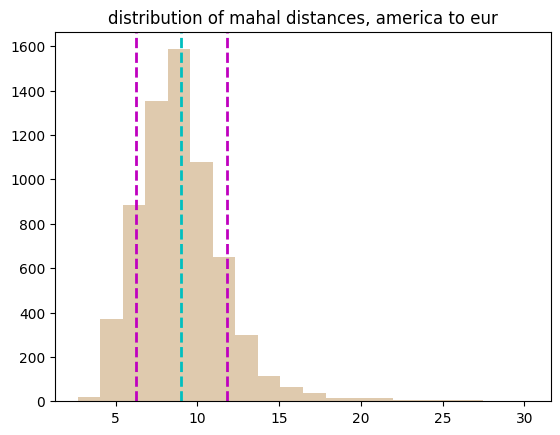

In [118]:
mean = np.mean(mahal_distances)
std_dev = np.std(mahal_distances)

# Create histogram
plt.hist(mahal_distances, bins=20, alpha=0.7, color='tan')

# Mark the mean
plt.axvline(mean, color='c', linestyle='dashed', linewidth=2, label='Mean')

# Mark one standard deviation on either side of the mean
plt.axvline(mean + std_dev, color='m', linestyle='dashed', linewidth=2, label='+1 STD')
plt.axvline(mean - std_dev, color='m', linestyle='dashed', linewidth=2, label='-1 STD')
plt.title('distribution of mahal distances, america to eur')

Text(0.5, 1.0, 'distribution of mahal distances, eur to eur')

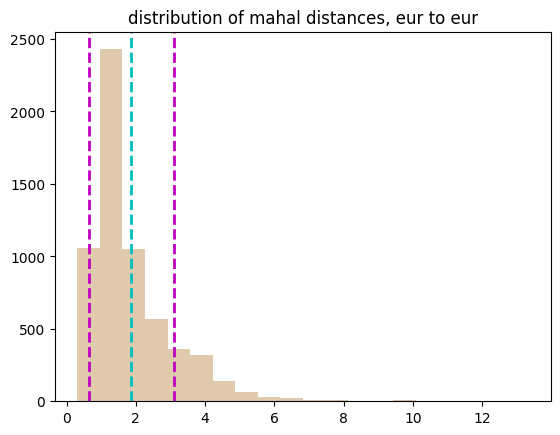

In [119]:
mean = np.mean(mahal_distances_eur)
std_dev = np.std(mahal_distances_eur)
# z = 1.96
# upper_bound = mean + z * std_dev

plt.hist(mahal_distances_eur, bins=20, alpha=0.7, color='tan')

# Mark the mean
plt.axvline(mean, color='c', linestyle='dashed', linewidth=2, label='Mean')

# Mark one standard deviation on either side of the mean
plt.axvline(mean + std_dev, color='m', linestyle='dashed', linewidth=2, label='+1 STD')
plt.axvline(mean - std_dev, color='m', linestyle='dashed', linewidth=2, label='-1 STD')
# plt.axvline(upper_bound, color='k', linestyle='dashed', linewidth=2, label='-1 STD')
plt.title('distribution of mahal distances, eur to eur')

In [120]:
print('Euro range of distances:', mahal_distances_eur.min(), mahal_distances_eur.max())

Euro range of distances: 0.3142245546499764 13.331635681845846


In [121]:
america_points['dist'] = mahal_distances


In [122]:
mahal_distances_eur = mahal_distances_eur.reset_index(drop=True)

crta_coords_filtered['dist'] = mahal_distances_eur

(-14641852.624039328, -6841695.90415462, 2746944.401339209, 7307496.882081329)

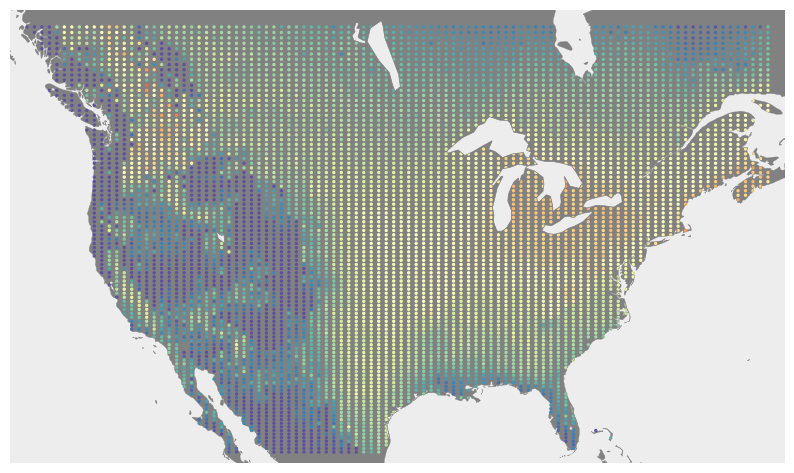

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from rasterio.warp import calculate_default_transform, reproject, Resampling
import matplotlib.pyplot as plt

extent = [-131.53, -61.46, 24.09, 54.90]

map_projection = ccrs.Mercator() 

great_lakes = cfeature.NaturalEarthFeature(category='physical', name='lakes', scale='110m')

shapefile_path = 'data/shapefiles/ne_110m_land/ne_110m_land.shp'
gdf = gpd.read_file(shapefile_path)

lakes_shapefile_path = 'data/shapefiles/ne_110m_lakes/ne_110m_lakes.shp'
lakes_gdf = gpd.read_file(lakes_shapefile_path)

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': map_projection})
ax.set_extent(extent, crs=ccrs.PlateCarree())  # Adjust as needed

ax.add_feature(cfeature.LAND, facecolor='#818181', edgecolor='gray', linewidth=.5)
ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
ax.add_feature(great_lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')


ax.scatter(america_points['lon'], america_points['lat'], transform=ccrs.PlateCarree(), 
           c=america_points['dist'], cmap='Spectral', vmin=0.4, vmax = 12.2, s=2)

ax.axis('off')
